In [2]:
# 課題1
import numpy as np

C = np.array([[3, 5, 7], [-2, 4, 6], [8, 9, 10]])
D = np.array([[-2, 0, 1], [1, -3, 2], [0, 2, -1]])

# ①
print(C + D)
# ②
print(C - D)
# ③
print(np.dot(D, C))
# ④
det_D = np.linalg.det(D)
if det_D != 0:
    D_inverse = np.linalg.inv(D)
    print(D_inverse)
else:
    print("逆行列は存在しません。")
# ⑤
eigenvalues, eigenvectors = np.linalg.eig(D)
print("固有値:", eigenvalues)
print("固有ベクトル:")
print(eigenvectors)

[[ 1  5  8]
 [-1  1  8]
 [ 8 11  9]]
[[ 5  5  6]
 [-3  7  4]
 [ 8  7 11]]
[[  2  -1  -4]
 [ 25  11   9]
 [-12  -1   2]]
[[-0.25  0.5   0.75]
 [ 0.25  0.5   1.25]
 [ 0.5   1.    1.5 ]]
固有値: [-4.         -2.41421356  0.41421356]
固有ベクトル:
[[-0.26726124  0.89180581  0.32037724]
 [-0.80178373  0.26120387  0.54691816]
 [ 0.53452248 -0.36939806  0.77345908]]


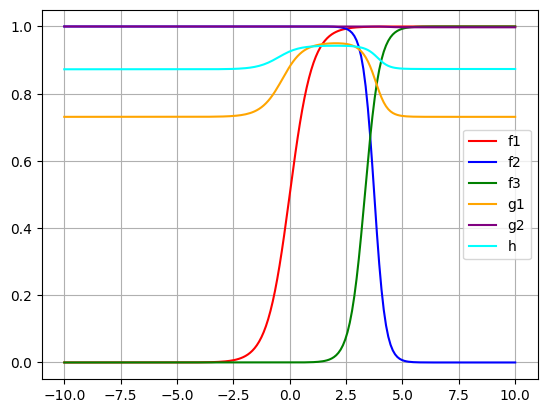

In [ ]:
# 課題2
import matplotlib.pyplot as plt

def activation(x):
    return 1 / (1 + np.exp(-x))

x_point = np.linspace(-10, 10, 200)

f1_results = [activation(2*x) for x in x_point]
f2_results = [activation(-4*x + 15) for x in x_point]
f3_results = [activation(3*x - 10) for x in x_point]
g1_results = [activation(2*f1_results[i] + f2_results[i] - f3_results[i]) for i in range(len(x_point))]
g2_results = [activation(f1_results[i] + 8*f2_results[i] - 2*f3_results[i] + 7) for i in range(len(x_point))]
h_results = [activation(4*g1_results[i] - 3*g2_results[i] + 2) for i in range(len(x_point))]

plt.plot(x_point, f1_results, color='red', label='f1')
plt.plot(x_point, f2_results, color='blue', label='f2')
plt.plot(x_point, f3_results, color='green', label='f3')
plt.plot(x_point, g1_results, color='orange', label='g1')
plt.plot(x_point, g2_results, color='purple', label='g2')
plt.plot(x_point, h_results, color='cyan', label='h')

plt.grid()
plt.legend()
plt.show()


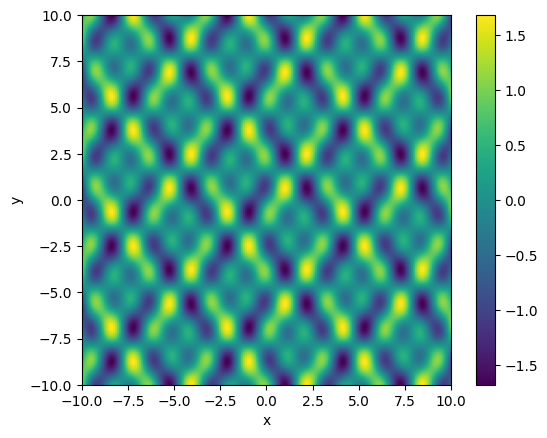

In [10]:
# 課題3
def g(x, y):
    return np.sin(2*x)*np.cos(y) - np.cos(3*x)*np.sin(2*y)

x_point = np.linspace(-10, 10, 200)
y_point = np.linspace(-10, 10, 200)

X, Y = np.meshgrid(x_point, y_point)
Z = g(X, Y)

plt.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

24.86%
9.47%


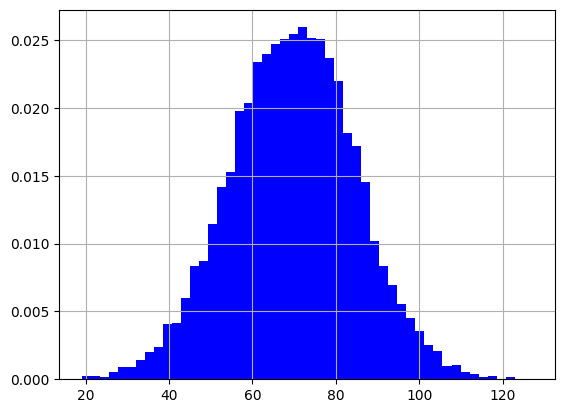

In [17]:
# 課題4
data = np.random.normal(loc=70, scale=15, size=10000)

# 1
print(f"{(np.sum(data >= 80) / len(data)) * 100}%")

# 2
print(f"{(np.sum(data < 50) / len(data)) * 100}%")

# 3
plt.hist(data, bins=50, density=True, color='blue')
plt.grid(True)
plt.show()

2次曲線の式: y = 6.26x^2 + -22.10x + 22.86
3次曲線の式: y = 0.75x^3 + -2.74x^2 + 8.65x + -4.14


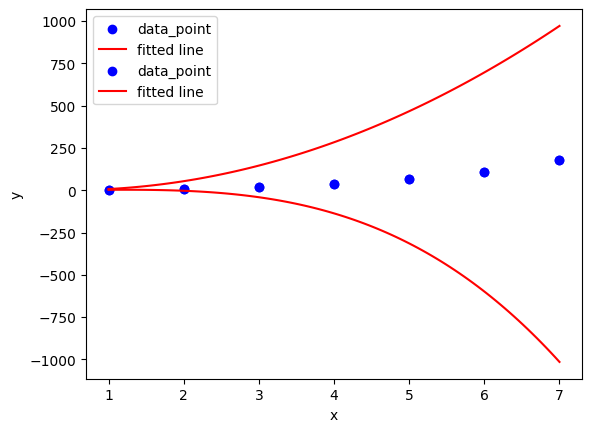

In [ ]:
# 課題5

x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 7, 18, 35, 65, 110, 180])

dimensions = [2, 3]

def print_polynomial(coefficients, dimension):
    terms = []
    for i, coeff in enumerate(coefficients):
        power = dimension - i
        if power == 0:
            terms.append(f"{coeff:.2f}")
        elif power == 1:
            terms.append(f"{coeff:.2f}x")
        else:
            terms.append(f"{coeff:.2f}x^{power}")
    polynomial = " + ".join(terms)
    print(f"{dimension}次曲線の式: y = {polynomial}")
    
def y_fit(coefficients, x_range):
    y_fit = []
    for x in x_range:
        result = 0
        for i, coeff in enumerate(coefficients):
            result += coeff*(x**i)
        y_fit.append(result)
    return y_fit


for dimension in dimensions:
    coefficients = np.polyfit(x, y, dimension)
    print_polynomial(coefficients, dimension)
    
    plt.scatter(x, y, label='data_point', color='blue')
    x_range = np.linspace(min(x), max(x), 100)
    plt.plot(x_range, y_fit(coefficients, x_range), label='fitted line', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 絶対おかしい


In [24]:
# 課題6

import pulp

prob = pulp.LpProblem(name='Linear', sense=pulp.LpMaximize)

x1 = pulp.LpVariable("x1", lowBound=None)
x2 = pulp.LpVariable("x2", lowBound=None)
x3 = pulp.LpVariable("x3", lowBound=None)
x4 = pulp.LpVariable("x4", lowBound=None)

prob += 2*x1 + 5*x2 - 3*x3 + 4*x4 == 15
prob += -4*x1 + x2 + 2*x3 - x4 == -10
prob += 3*x1 - 2*x2 + 4*x3 + x4 == 8
prob += x1 + 3*x2 - x3 + 2*x4 == 6
prob.solve()

print("x1 =", x1.varValue)
print("x2 =", x2.varValue)
print("x3 =", x3.varValue)
print("x4 =", x4.varValue)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/irisakeishi/Desktop/コンピュータ演習/venv/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/nm/1djp5_cj6v72q94s_t8_km440000gn/T/ce416468094d40daaffc7873be95cfb8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/nm/1djp5_cj6v72q94s_t8_km440000gn/T/ce416468094d40daaffc7873be95cfb8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 27 RHS
At line 32 BOUNDS
At line 38 ENDATA
Problem MODEL has 4 rows, 5 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 4 (0) rows, 4 (-1) columns and 16 (0) elements
0  Obj -0 Primal inf 9.499996 (4) Dual inf 0.066246 (4) w.o. free dual inf (0)
4  Obj -0
Optimal - objective value 0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 4 iterations time 0.002, Pre

In [ ]:
# 課題7-1

prob = pulp.LpProblem("Knapsack Problem", pulp.LpMaximize)

x1 = pulp.LpVariable("荷物1", cat=pulp.LpBinary)
x2 = pulp.LpVariable("荷物2", cat=pulp.LpBinary)
x3 = pulp.LpVariable("荷物3", cat=pulp.LpBinary)
x4 = pulp.LpVariable("荷物4", cat=pulp.LpBinary)
x5 = pulp.LpVariable("荷物5", cat=pulp.LpBinary)

prob += 90*x1 + 85*x2 + 60*x3 + 50*x4 + 45*x5

prob += 35*x1 + 30*x2 + 20*x3 + 15*x4 + 10*x5 <= 60

prob.solve()

print("選択された荷物(荷物の個数1個):")
for var in prob.variables():
    if var.varValue == 1:
        print(var.name)
print("最大の価値:", pulp.value(prob.objective))



/Users/irisakeishi/Desktop/コンピュータ演習/venv/lib/python3.11/site-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/irisakeishi/Desktop/コンピュータ演習/venv/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/nm/1djp5_cj6v72q94s_t8_km440000gn/T/b03cf87bc82345409ec1f5020957a321-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/nm/1djp5_cj6v72q94s_t8_km440000gn/T/b03cf87bc82345409ec1f5020957a321-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 27 RHS
At line 29 BOUNDS
At line 35 ENDATA
Problem MODEL has 1 rows, 5 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 197.5 - 0.00 seconds
Cgl0004I processed model has 1 rows, 5 columns (5 integer (5 of which binary)) and 5 elements
Cutoff increment increased from 1e-05 to 4.9999
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.5
Cbc0038I Pass   1: suminf.    0.50000 (1) obj.

In [27]:
# 課題7-2

prob = pulp.LpProblem("Knapsack Problem", pulp.LpMaximize)

x1 = pulp.LpVariable("荷物1", cat=pulp.LpInteger)
x2 = pulp.LpVariable("荷物2", cat=pulp.LpInteger)
x3 = pulp.LpVariable("荷物3", cat=pulp.LpInteger)
x4 = pulp.LpVariable("荷物4", cat=pulp.LpInteger)
x5 = pulp.LpVariable("荷物5", cat=pulp.LpInteger)

prob += 90*x1 + 85*x2 + 60*x3 + 50*x4 + 45*x5

prob += 35*x1 + 30*x2 + 20*x3 + 15*x4 + 10*x5 <= 60

prob.solve()

print("選択された荷物(荷物の個数無制限):")
for var in prob.variables():
    if var.varValue == 1:
        print(var.name)
print("最大の価値:", pulp.value(prob.objective))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/irisakeishi/Desktop/コンピュータ演習/venv/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/nm/1djp5_cj6v72q94s_t8_km440000gn/T/0aef014174894b18a2e75abff4552b8e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/nm/1djp5_cj6v72q94s_t8_km440000gn/T/0aef014174894b18a2e75abff4552b8e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 27 RHS
At line 29 BOUNDS
At line 35 ENDATA
Problem MODEL has 1 rows, 5 columns and 5 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is unbounded - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

選択された荷物(荷物の個数無制限):
最大の価値: 270.0
